In [8]:
import os
import sys

print(os.getcwd())
cwd0 = './config/'
sys.path.append(cwd0)

import visualID_Eng as vID
from visualID_Eng import color
vID.init(cwd0)
import tools4PytChem as t4p

/home/romuald/ENSEIGNEMENT/0-JupyterNotebooks/PytChem


**Start at:** Saturday 05 November 2022, 01:11:17  
**Hostname:** localhost.localdomain (Linux)

<p style="text-align: center"><img width="800px" src="./config/svg/logoPytChem.svg" style="margin-left:auto; margin-right:auto"/></p>

# Hydrogen Atom

## Prerequisite : physical constants and conversion factors

### Physical constants

In [9]:
import scipy.constants as sc
print(sc.find("Rydberg"))
print(f'{color.BOLD}Rydberg constant Rinf: {sc.physical_constants["Rydberg constant"]}{color.OFF}')
print(sc.find("Planck"))
print(f'{color.BOLD}Planck constant: {sc.physical_constants["Planck constant"]}{color.OFF}')
print(f'{color.BOLD}Reduced Planck constant: {sc.physical_constants["reduced Planck constant"]}{color.OFF}')
print(sc.find("charge"))
print(f'{color.BOLD}Elementary charge: {sc.physical_constants["elementary charge"]}{color.OFF}')
print(sc.find("light"))
print(f'{color.BOLD}speed of light in vacuum: {sc.physical_constants["speed of light in vacuum"]}{color.OFF}')
print(sc.find("electron mass"))
print(f'{color.BOLD}Electron mass: {sc.physical_constants["electron mass"]}{color.OFF}')
print(sc.find("proton mass"))
print(f'{color.BOLD}Proton mass: {sc.physical_constants["proton mass"]}{color.OFF}')
print(sc.find("vacuum"))
print(f'{color.BOLD}Vacuum electric permittivity: {sc.physical_constants["vacuum electric permittivity"]}{color.OFF}')

Rinf = sc.value("Rydberg constant")
h = sc.value("Planck constant")
hbar = sc.value("reduced Planck constant")
e = sc.value("elementary charge")
c = sc.value("speed of light in vacuum")
me = sc.value("electron mass")
mp = sc.value("proton mass")
eps0 = sc.value("vacuum electric permittivity")
pi = sym.pi

muH = (me*mp)/(me+mp)
print(f'{color.BOLD}Hydrogen atom reduced mass: {muH} kg{color.OFF}')

['Rydberg constant', 'Rydberg constant times c in Hz', 'Rydberg constant times hc in J', 'Rydberg constant times hc in eV']
Rydberg constant Rinf: (10973731.56816, 'm^-1', 2.1e-05)
['Planck constant', 'Planck constant in eV/Hz', 'Planck length', 'Planck mass', 'Planck mass energy equivalent in GeV', 'Planck temperature', 'Planck time', 'molar Planck constant', 'reduced Planck constant', 'reduced Planck constant in eV s', 'reduced Planck constant times c in MeV fm']
Planck constant: (6.62607015e-34, 'J Hz^-1', 0.0)
Reduced Planck constant: (1.054571817e-34, 'J s', 0.0)
['atomic unit of charge', 'atomic unit of charge density', 'deuteron rms charge radius', 'electron charge to mass quotient', 'elementary charge', 'elementary charge over h-bar', 'proton charge to mass quotient', 'proton rms charge radius']
Elementary charge: (1.602176634e-19, 'C', 0.0)
['speed of light in vacuum']
speed of light in vacuum: (299792458.0, 'm s^-1', 0.0)
['alpha particle-electron mass ratio', 'deuteron-elect

### Conversion factors

In [10]:
h2eV = 2*Rinf*h*c/e
print(f"{color.BLUE}{color.BOLD}Hartree to eV conversion factor: 1h = {h2eV:.3f} eV{color.OFF}")

Hartree to eV conversion factor: 1h = 27.211 eV


## **1.** Energies and transitions

### Ionisation energy

$$E_{i}=\frac{Z^{2}}{2}\frac{\mu_{\mathrm{H}}e^{4}}{\left(\hbar\times4\pi\varepsilon_{0}\right)^{2}}$$

In [11]:
Z=1
Ei = 0.5*Z**2*muH*e**4/((4*pi*eps0)**2*hbar**2)
Ei_eV = Ei/e
print(f"{color.BLUE}{color.BOLD}Énergie d'ionisation de H : {Ei_eV:.3f} eV{color.OFF}")

Énergie d'ionisation de H : 13.598 eV


In [12]:
import sympy as sym
from tools4PytChem import PrintLatexStyleSymPyEquation as ple

Z=1
for n in range(1,11):
    print(f"E({n}) = {-Ei_eV*Z**2/n**2:.3f} eV")

E(1) = -13.598 eV
E(2) = -3.400 eV
E(3) = -1.511 eV
E(4) = -0.850 eV
E(5) = -0.544 eV
E(6) = -0.378 eV
E(7) = -0.278 eV
E(8) = -0.212 eV
E(9) = -0.168 eV
E(10) = -0.136 eV


## **2.** Wavefunctions

### **2.1.** Mathematical functions

#### **2.1.1.** 1st Shell: 1s AO = $\psi_{100}$

In [35]:
from sympy.physics.hydrogen import Psi_nlm
r=sym.Symbol("r", positive=True)
phi=sym.Symbol("phi", real=True)
theta=sym.Symbol("theta", real=True)
print(f"ψ100 : {Psi_nlm(1,0,0,r,phi,theta,1)}")

from sympy.physics.hydrogen import R_nl
print(f"R10 : {R_nl(1, 0, r, 1)}")

from sympy import Ynm
print(f"Y00 : {Ynm(0,0,theta,phi)}")
print(f"Y00 : {Ynm(0,0,theta,phi).expand(func=True)}")
print(f"Y00 : {sym.simplify(Ynm(0,0,theta,phi).expand(func=True))}")

R10 = R_nl(1, 0, r, 1)
Y00 = Ynm(0,0,theta,phi).expand(func=True)
psi_100 = sym.simplify(R10*Y00)
print(f"R10 x Y00 : {psi_100}")
ple(psi_100)

from sympy import oo
R_norme = sym.integrate(R10**2*r**2, (r, 0, oo))
print(f"Norme de R10 : {R_norme}")
Y_norme = sym.integrate(Y00**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de Y00 : {Y_norme}")

ψ100 : exp(-r)/sqrt(pi)
R10 : 2*exp(-r)
Y00 : Ynm(0, 0, theta, phi)
Y00 : 1/(2*sqrt(pi))
Y00 : 1/(2*sqrt(pi))
R10 x Y00 : exp(-r)/sqrt(pi)


<IPython.core.display.Math object>

Norme de R10 : 1
Norme de Y00 : 1


#### **2.1.2.** 2nd shell

##### 2s AO = $\psi_{200}$

In [36]:
print(f"ψ200 : {Psi_nlm(2,0,0,r,phi,theta,1)}")

from sympy.physics.hydrogen import R_nl
print(f"R20 : {R_nl(2, 0, r, 1)}")

from sympy import Ynm
print(f"Y00 : {Ynm(0,0,theta,phi)}")
print(f"Y00 : {Ynm(0,0,theta,phi).expand(func=True)}")
print(f"Y00 : {sym.simplify(Ynm(0,0,theta,phi).expand(func=True))}")

R20 = R_nl(2, 0, r, 1)
Y00 = Ynm(0,0,theta,phi).expand(func=True)
psi_200 = sym.simplify(R20*Y00)
print(f"R20 x Y00 : {psi_200}")
ple(psi_200)

from sympy import oo
R_norme = sym.integrate(R20**2*r**2, (r, 0, oo))
print(f"Norme de R20 : {R_norme}")
Y_norme = sym.integrate(Y00**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de Y00 : {Y_norme}")

ψ200 : sqrt(2)*(2 - r)*exp(-r/2)/(8*sqrt(pi))
R20 : sqrt(2)*(2 - r)*exp(-r/2)/4
Y00 : Ynm(0, 0, theta, phi)
Y00 : 1/(2*sqrt(pi))
Y00 : 1/(2*sqrt(pi))
R20 x Y00 : sqrt(2)*(2 - r)*exp(-r/2)/(8*sqrt(pi))


<IPython.core.display.Math object>

Norme de R20 : 1
Norme de Y00 : 1


##### Radial part of the 2p AOs

In [15]:
from sympy.physics.hydrogen import R_nl
R21 = R_nl(2, 1, r, 1)
print(f"R21 : {R21}")
from sympy import oo
R_norme = sym.integrate(R21**2*r**2, (r, 0, oo))
print(f"Norme de R21 : {R_norme}")

R21 : sqrt(6)*r*exp(-r/2)/12
Norme de R21 : 1


##### 2p_z AO = $\psi_{210}$

In [37]:
print(f"ψ210 : {Psi_nlm(2,1,0,r,phi,theta,1)}")

from sympy import Ynm
Y10 = sym.simplify(Ynm(1,0,theta,phi).expand(func=True))
print(f"Y10 : {Y10}")
Y_norme = sym.integrate(Y10**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de Y10 : {Y_norme}")
psi_210 = sym.simplify(R21*Y10)
print(f"R21 x Y10 : {psi_210}")
ple(psi_210)

ψ210 : sqrt(2)*r*exp(-r/2)*cos(theta)/(8*sqrt(pi))
Y10 : sqrt(3)*cos(theta)/(2*sqrt(pi))
Norme de Y10 : 1
R21 x Y10 : sqrt(2)*r*exp(-r/2)*cos(theta)/(8*sqrt(pi))


<IPython.core.display.Math object>

##### 2p_x AO = $\psi_{211}$

In [38]:
print(f"ψ211 : {Psi_nlm(2,1,1,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S11 = sym.simplify(Znm(1,1,theta,phi).expand(func=True))
print(f"S11: {S11}")
S_norme = sym.integrate(S11**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S11: {S_norme}")
psi_211 = sym.simplify(R21*S11)
print(f"R21 x S11: {psi_211}")
ple(psi_211)

ψ211 : -r*exp(-r/2)*exp(I*phi)*sin(theta)/(8*sqrt(pi))
S11: -sqrt(3)*sin(theta)*cos(phi)/(2*sqrt(pi))
Norme de S11: 1
R21 x S11: -sqrt(2)*r*exp(-r/2)*sin(theta)*cos(phi)/(8*sqrt(pi))


<IPython.core.display.Math object>

##### 2p_y AO = $\psi_{21-1}$

In [39]:
print(f"ψ21-1 : {Psi_nlm(2,1,-1,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S1_1 = sym.simplify(Znm(1,-1,theta,phi).expand(func=True))
print(f"S1-1: {S1_1}")
S_norme = sym.integrate(S1_1**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S1-1 : {S_norme}")
psi_21_1 = sym.simplify(R21*S1_1)
print(f"R21 x S1-1 : {psi_21_1}")
ple(psi_21_1)

ψ21-1 : r*exp(-r/2)*exp(-I*phi)*sin(theta)/(8*sqrt(pi))
S1-1: -sqrt(3)*sin(phi)*sin(theta)/(2*sqrt(pi))
Norme de S1-1 : 1
R21 x S1-1 : -sqrt(2)*r*exp(-r/2)*sin(phi)*sin(theta)/(8*sqrt(pi))


<IPython.core.display.Math object>

#### **2.1.3.** 3rd shell

##### 3s AO = $\psi_{300}$

In [40]:
print(f"ψ300 : {Psi_nlm(3,0,0,r,phi,theta,1)}")

from sympy.physics.hydrogen import R_nl
print(f"R30 : {R_nl(3, 0, r, 1)}")

from sympy import Ynm
print(f"Y00 : {Ynm(0,0,theta,phi)}")
print(f"Y00 : {Ynm(0,0,theta,phi).expand(func=True)}")
print(f"Y00 : {sym.simplify(Ynm(0,0,theta,phi).expand(func=True))}")

R30 = R_nl(3, 0, r, 1)
Y00 = Ynm(0,0,theta,phi).expand(func=True)
psi_300 = sym.simplify(R30*Y00)
print(f"R30 x Y00 : {psi_300}")
ple(psi_300)

from sympy import oo
R_norme = sym.integrate(R30**2*r**2, (r, 0, oo))
print(f"Norme de R30 : {R_norme}")
Y_norme = sym.integrate(Y00**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de Y00 : {Y_norme}")

ψ300 : sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/(27*sqrt(pi))
R30 : 2*sqrt(3)*(2*r**2/9 - 2*r + 3)*exp(-r/3)/27
Y00 : Ynm(0, 0, theta, phi)
Y00 : 1/(2*sqrt(pi))
Y00 : 1/(2*sqrt(pi))
R30 x Y00 : sqrt(3)*(2*r**2 - 18*r + 27)*exp(-r/3)/(243*sqrt(pi))


<IPython.core.display.Math object>

Norme de R30 : 1
Norme de Y00 : 1


##### Radial part of the 3p AOs

In [20]:
from sympy.physics.hydrogen import R_nl
R31 = R_nl(3, 1, r, 1)
print(f"R31 : {R31}")
from sympy import oo
R_norme = sym.integrate(R31**2*r**2, (r, 0, oo))
print(f"Norme de R31 : {R_norme}")

R31 : sqrt(6)*r*(4 - 2*r/3)*exp(-r/3)/81
Norme de R31 : 1


##### 3p_z AO = $\psi_{310}$

In [41]:
print(f"ψ310 : {Psi_nlm(3,1,0,r,phi,theta,1)}")

from sympy import Ynm
Y10 = sym.simplify(Ynm(1,0,theta,phi).expand(func=True))
print(f"Y10 : {Y10}")
Y_norme = sym.integrate(Y10**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de Y10 : {Y_norme}")
psi_310 = sym.simplify(R31*Y10)
print(f"R31 x Y10 : {psi_310}")
ple(psi_310)

ψ310 : sqrt(2)*r*(4 - 2*r/3)*exp(-r/3)*cos(theta)/(54*sqrt(pi))
Y10 : sqrt(3)*cos(theta)/(2*sqrt(pi))
Norme de Y10 : 1
R31 x Y10 : sqrt(2)*r*(6 - r)*exp(-r/3)*cos(theta)/(81*sqrt(pi))


<IPython.core.display.Math object>

##### 3p_x AO = $\psi_{311}$

In [42]:
print(f"ψ311 : {Psi_nlm(3,1,1,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S11 = sym.simplify(Znm(1,1,theta,phi).expand(func=True))
print(f"S11: {S11}")
S_norme = sym.integrate(S11**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S11: {S_norme}")
psi_311 = sym.simplify(R31*S11)
print(f"R31 x S11: {psi_311}")
ple(psi_311)

ψ311 : -r*(4 - 2*r/3)*exp(-r/3)*exp(I*phi)*sin(theta)/(54*sqrt(pi))
S11: -sqrt(3)*sin(theta)*cos(phi)/(2*sqrt(pi))
Norme de S11: 1
R31 x S11: sqrt(2)*r*(r - 6)*exp(-r/3)*sin(theta)*cos(phi)/(81*sqrt(pi))


<IPython.core.display.Math object>

##### 3p_y AO = $\psi_{31-1}$

In [43]:
print(f"ψ21-1 : {Psi_nlm(3,1,-1,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S1_1 = sym.simplify(Znm(1,-1,theta,phi).expand(func=True))
print(f"S1-1: {S1_1}")
S_norme = sym.integrate(S1_1**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S1-1 : {S_norme}")
psi_31_1 = sym.simplify(R31*S1_1)
print(f"R31 x S1-1 : {psi_31_1}")
ple(psi_31_1)

ψ21-1 : r*(4 - 2*r/3)*exp(-r/3)*exp(-I*phi)*sin(theta)/(54*sqrt(pi))
S1-1: -sqrt(3)*sin(phi)*sin(theta)/(2*sqrt(pi))
Norme de S1-1 : 1
R31 x S1-1 : sqrt(2)*r*(r - 6)*exp(-r/3)*sin(phi)*sin(theta)/(81*sqrt(pi))


<IPython.core.display.Math object>

##### Radial part of the 3d AOs

In [24]:
from sympy.physics.hydrogen import R_nl
R32 = R_nl(3, 2, r, 1)
print(f"R32 : {R32}")
from sympy import oo
R_norme = sym.integrate(R32**2*r**2, (r, 0, oo))
print(f"Norme de R32 : {R_norme}")

R32 : 2*sqrt(30)*r**2*exp(-r/3)/1215
Norme de R32 : 1


##### 3d_z2 AO = $\psi_{320}$

In [44]:
print(f"ψ320 : {Psi_nlm(3,2,0,r,phi,theta,1)}")
print(f"ψ320 : {sym.simplify(Psi_nlm(3,2,0,r,phi,theta,1))}")

from sympy import Ynm
Y20 = sym.simplify(Ynm(2,0,theta,phi).expand(func=True))
print(f"Y20 : {Y20}")
Y_norme = sym.integrate(Y20**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de Y20 : {Y_norme}")
psi_320 = sym.simplify(R32*Y20)
print(f"R32 x Y20 : {psi_320}")
ple(psi_320)

ψ320 : 2*sqrt(30)*r**2*(3*sqrt(5)*cos(theta)**2/(4*sqrt(pi)) - sqrt(5)/(4*sqrt(pi)))*exp(-r/3)/1215
ψ320 : sqrt(6)*r**2*(3*cos(theta)**2 - 1)*exp(-r/3)/(486*sqrt(pi))
Y20 : sqrt(5)*(3*cos(theta)**2 - 1)/(4*sqrt(pi))
Norme de Y20 : 1
R32 x Y20 : sqrt(6)*r**2*(3*cos(theta)**2 - 1)*exp(-r/3)/(486*sqrt(pi))


<IPython.core.display.Math object>

##### 3d_ AO = $\psi_{321}$

In [45]:
print(f"ψ321 : {Psi_nlm(3,2,1,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S21 = sym.simplify(Znm(2,1,theta,phi).expand(func=True))
print(f"S21: {S21}")
S_norme = sym.integrate(S21**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S21: {S_norme}")
psi_321 = sym.simplify(R32*S21)
print(f"R32 x S21: {psi_321}")
ple(psi_321)

ψ321 : -r**2*exp(-r/3)*exp(I*phi)*sin(theta)*cos(theta)/(81*sqrt(pi))
S21: -sqrt(15)*sin(2*theta)*cos(phi)/(4*sqrt(pi))
Norme de S21: 1
R32 x S21: -sqrt(2)*r**2*exp(-r/3)*sin(2*theta)*cos(phi)/(162*sqrt(pi))


<IPython.core.display.Math object>

##### 3d_ AO = $\psi_{32-1}$

In [46]:
print(f"ψ32-1 : {Psi_nlm(3,2,-1,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S2_1 = sym.simplify(Znm(2,-1,theta,phi).expand(func=True))
print(f"S2-1: {S2_1}")
S_norme = sym.integrate(S2_1**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S2-1: {S_norme}")
psi_32_1 = sym.simplify(R32*S2_1)
print(f"R32 x S2_1: {psi_32_1}")
ple(psi_32_1)

ψ32-1 : r**2*exp(-r/3)*exp(-I*phi)*sin(theta)*cos(theta)/(81*sqrt(pi))
S2-1: -sqrt(15)*sin(phi)*sin(2*theta)/(4*sqrt(pi))
Norme de S2-1: 1
R32 x S2_1: -sqrt(2)*r**2*exp(-r/3)*sin(phi)*sin(2*theta)/(162*sqrt(pi))


<IPython.core.display.Math object>

##### 3d_ AO = $\psi_{322}$

In [47]:
print(f"ψ322 : {Psi_nlm(3,2,2,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S22 = sym.simplify(Znm(2,2,theta,phi).expand(func=True))
print(f"S22: {S22}")
S_norme = sym.integrate(S22**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S22: {S_norme}")
psi_322 = sym.simplify(R32*S22)
print(f"R32 x S22: {psi_322}")
ple(psi_322)

ψ322 : 2*sqrt(30)*r**2*(-sqrt(30)*exp(2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(2*I*phi)/(8*sqrt(pi)))*exp(-r/3)/1215
S22: sqrt(15)*sin(theta)**2*cos(2*phi)/(4*sqrt(pi))
Norme de S22: 1
R32 x S22: sqrt(2)*r**2*exp(-r/3)*sin(theta)**2*cos(2*phi)/(162*sqrt(pi))


<IPython.core.display.Math object>

##### 3d_ AO = $\psi_{32-2}$

In [48]:
print(f"ψ32-2 : {Psi_nlm(3,2,-2,r,phi,theta,1)}")

from sympy import Znm #harmoniques sphériques réelles
S2_2 = sym.simplify(Znm(2,-2,theta,phi).expand(func=True))
print(f"S2-2: {S2_2}")
S_norme = sym.integrate(S2_2**2*sym.sin(theta), (theta, 0, pi), (phi, 0, 2*pi))
print(f"Norme de S2-2: {S_norme}")
psi_32_2 = sym.simplify(R32*S2_2)
print(f"R32 x S2_2: {psi_32_2}")
ple(psi_32_2)

ψ32-2 : 2*sqrt(30)*r**2*(-sqrt(30)*exp(-2*I*phi)*cos(theta)**2/(8*sqrt(pi)) + sqrt(30)*exp(-2*I*phi)/(8*sqrt(pi)))*exp(-r/3)/1215
S2-2: -sqrt(15)*sin(2*phi)*sin(theta)**2/(4*sqrt(pi))
Norme de S2-2: 1
R32 x S2_2: -sqrt(2)*r**2*exp(-r/3)*sin(2*phi)*sin(theta)**2/(162*sqrt(pi))


<IPython.core.display.Math object>

### **3.2** Radial parts

#### **3.2.1** Plots

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

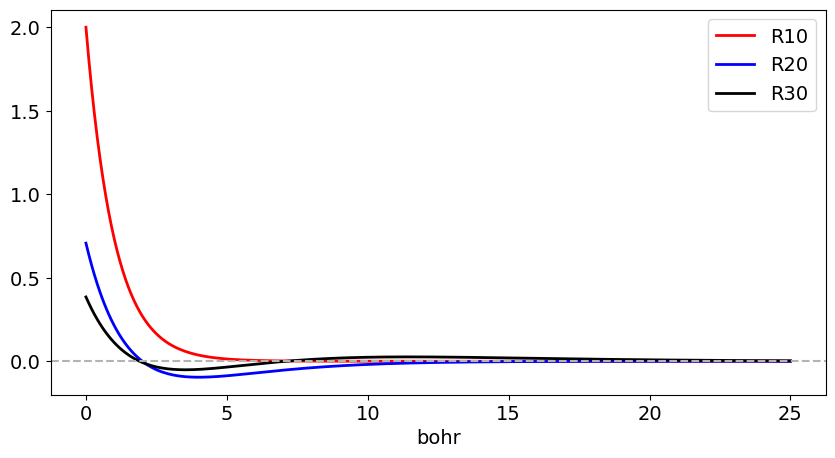

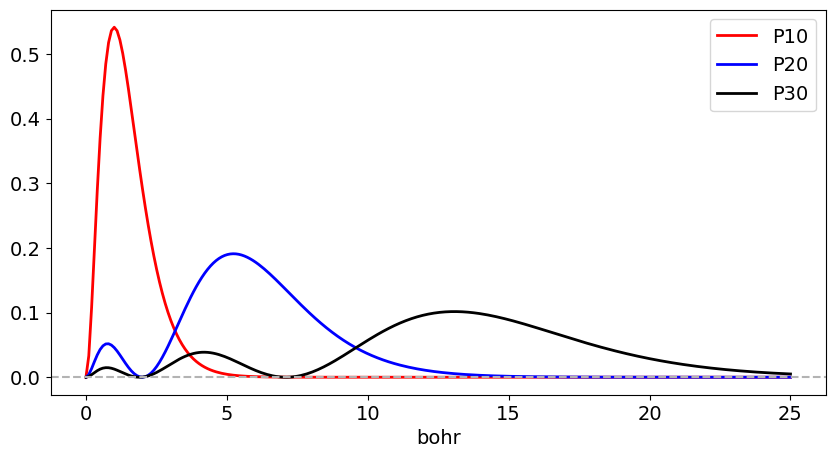

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

ple(R10)
R10num = lambdify([r], R10)
ple(R20)
R20num = lambdify([r], R20)
ple(R30)
R30num = lambdify([r], R30)

rr = np.linspace(0.,25.,250) # r en bohr

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 14})

plt.plot(rr, R10num(rr),linewidth=2,color='red',label="R10")
plt.plot(rr, R20num(rr),linewidth=2,color='blue',label="R20")
plt.plot(rr, R30num(rr),linewidth=2,color='black',label="R30")
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlabel("bohr")
plt.legend()
plt.show()

P10 = lambdify([r], (R10*r)**2)
P20 = lambdify([r], (R20*r)**2)
P30 = lambdify([r], (R30*r)**2)

plt.plot(rr, P10(rr),linewidth=2,color='red',label="P10")
plt.plot(rr, P20(rr),linewidth=2,color='blue',label="P20")
plt.plot(rr, P30(rr),linewidth=2,color='black',label="P30")
plt.axhline(y = 0, color = '0.7',linestyle='--')
plt.xlabel("bohr")
plt.legend()
plt.show()

In [231]:
vID.end(cwd0)

**End at:** Saturday 05 November 2022, 01:00:27  
**Duration:** 02:10:38 001ms

<p style="text-align: center"><img width="800px" src="./config/svg/logoEnd.svg" style="margin-left:auto; margin-right:auto"/></p>